In [1]:
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [3]:
pd.Series(dtype='object')

Series([], dtype: object)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [10]:
def series_operation(s1, s2, operation):
  '''This functions takes in 2 pandas series and adds them , subtracts them or divides them based on the operation specified while calling the function'''
  available_operations = ['add', 'subtract', 'divide']
  if operation in available_operations:
    if operation =='add':
      return s1+s2
    if operation =='subtract':
      return s1-s2
    if operation =='divide':
      return s1/s2
  else:
    return "Choose one of these operations: 'add', 'subtract', 'divide'"

s1 = pd.Series([4,5,6])
s2 = pd.Series([1,2,3])
series_operation(s1,s2, 'loss')

"Choose one of these operations: 'add', 'subtract', 'divide'"

###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [16]:
s1 =  pd.Series([2, 4, 6, 8, 10])
s2 =  pd.Series([1, 3, 5, 7, 10])
s1>s2

0     True
1     True
2     True
3     True
4    False
dtype: bool

###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [27]:
def change_to_float(s):
  new = []
  for i in s:
    if str(i).isnumeric() or str(i) == True or str(i)== False:
      new.append(i)

  new = pd.Series(new)
  return pd.to_numeric(new)

s = pd.Series([1,2,'Python', 2.0, True, 100])
change_to_float(s)

0      1
1      2
2    100
dtype: int64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [52]:
runs = pd.read_csv('./batsman_runs_series.csv', index_col='batter').squeeze()
runs

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [54]:
runs.sort_values(ascending=False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [56]:
runs[runs>3000]

batter
AB de Villiers    5181
AM Rahane         4074
AT Rayudu         4190
CH Gayle          4997
DA Warner         5883
F du Plessis      3403
G Gambhir         4217
KA Pollard        3437
KD Karthik        4377
KL Rahul          3895
MK Pandey         3657
MS Dhoni          4978
RG Sharma         5881
RV Uthappa        4954
S Dhawan          6244
SK Raina          5536
SR Watson         3880
SV Samson         3526
V Kohli           6634
YK Pathan         3222
Name: batsman_run, dtype: int64

###`Q-8` No of players having runs above mean value?

In [58]:
runs[runs>runs.mean()].count()

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [60]:
items = pd.read_csv('./items (1).csv', index_col='item_name').squeeze()
items.head()

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
Name: item_price, dtype: object

In [61]:
# number of nan values
items.isna().sum()

50

In [66]:
def convert_to_rupee(num):
  '''This function takes in price in USD and converts it to INR'''
  return num*82

items = items.str.replace('$','', regex=True).astype('float').apply(convert_to_rupee)

In [69]:
items = items.fillna(items.mean())

In [70]:
# checking if null values are filled
items.isna().sum()

0

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [73]:
# mean price
items.mean().round(2)

611.97

In [76]:
items.quantile([.3,.5])

0.3    364.9
0.5    717.5
Name: item_price, dtype: float64

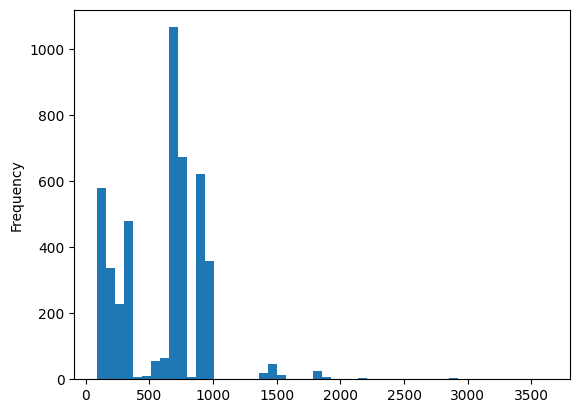

In [91]:
items.plot(kind='hist', bins=50);